## Dataset : Tips Dataset

Framing the problem :
1. Problem Statements : How might we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :
  1. Label : Tips
  1. Features : Total Bill and Size 
1. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
1. Action : Make food servers allocation 
1. Value : the sake of staff morale

## Table of Contents

1. Analyze tips data from seaborn
- Total Bill and size as independent variable
- Tips as dependent variable
2. Analyze the relationship
3. Apply Multiple Linear Regression
4. Perform Ftest and Ttest
5. Interpret the result
6. Use α = 5%

## Library

In [2]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

## Read Tips Dataset

In [6]:
tips = sns.load_dataset('tips')

## EDA (Exploratory Data Analysis)

To understand our data :
- Descriptive statistic
- Correlation
- Graphic Summary

In [9]:
tips[['tip', 'total_bill', 'size']]

,tip,total_bill,size
0,1.01,16.99,2
1,1.66,10.34,3
2,3.50,21.01,3
3,3.31,23.68,2
4,3.61,24.59,4
...,...,...,...
239,5.92,29.03,3
240,2.00,27.18,2
241,2.00,22.67,2
242,1.75,17.82,2


In [10]:
tips[['tip', 'total_bill', 'size']].describe()

,tip,total_bill,size
count,244.000000,244.000000,244.000000
mean,2.998279,19.785943,2.569672
std,1.383638,8.902412,0.951100
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.900000,17.795000,2.000000
75%,3.562500,24.127500,3.000000
max,10.000000,50.810000,6.000000


In [11]:
tips[['tip', 'total_bill', 'size']].corr()

,tip,total_bill,size
tip,1.000000,0.675734,0.489299
total_bill,0.675734,1.000000,0.598315
size,0.489299,0.598315,1.000000


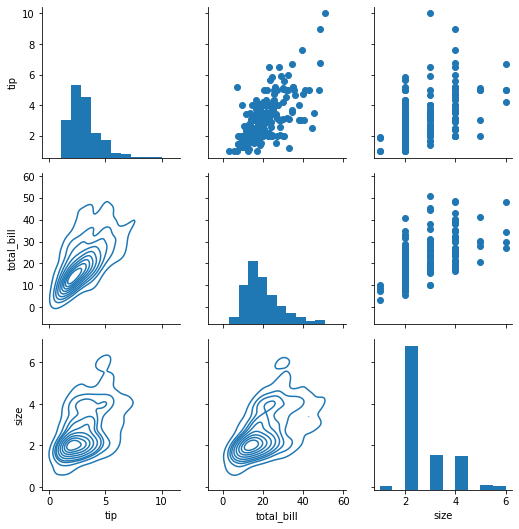

In [15]:
g = sns.PairGrid(tips[['tip', 'total_bill', 'size']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## Multiple Linear Regression

We start to apply multiple linear regression to the dataset:
- Y : Tips
- x : Total Bill and Size

In [25]:
sm_lm = sm.OLS(tips['tip'], sm.add_constant(tips[['total_bill', 'size']]))
result = sm_lm.fit()

In [26]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           9.67e-34
Time:                        19:34:45   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

## Interpretation

F-Test:
<br>
B1, B2 : P-Value of the Simultant test is below 0.05. We have enough evidence that minimum either totall bill or size affect tip that given to the food servers.
<br>
Partial Test:
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill and size of the party has value of zero. in this case, it doesn't make sense that if there are people who paid food freely and size of the party zero. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that total bill increase tip that given to the food servers
1. B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that size of the party increase tip that given to the food servers

Parameter Estimate:
1. B0 = 0.689 : This is not meaningfull to be interpreted
1. B1 = 0.0927 : When the total bill increase 1 Dollar, the tip will increase about 0.0927 Dollar or When the total bill increase 10 Dollar, the tip will increase about 9.27 Dollar (*This interpretation only applied when total bill fall between 3.07 Dollar and 50.81 Dollar)
1. B2 = 0.1926 : When the size of the party increase 1 person, the tip will increase about 0.1926 Dollar(*This interpretation only applied when size of the party fall between 1 and 6) 
1. It is strongly recommended to interprete within the interval of predictor and no changes in another variable

Coefficient Determination:
<br>
R-Square adj = 46.3% : This model can explain 46.3% variation of tips.
<br>
(* by adding size of the party the coefficient determination increase from 45.7% to 46.3%)


## Diagnostics and Collinearity

## Table of Contents

1. Analyze tips data from seaborn
- Total Bill and Size as independent variable
- Tips as dependent variable

2. Apply Multiple Linear Regression
3. Check The Normality of Assumption
4. Check The Guss-Markov Assumption
5. Check The Multicollinearity

## 3. Normality Assumption

C:\Users\amarz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

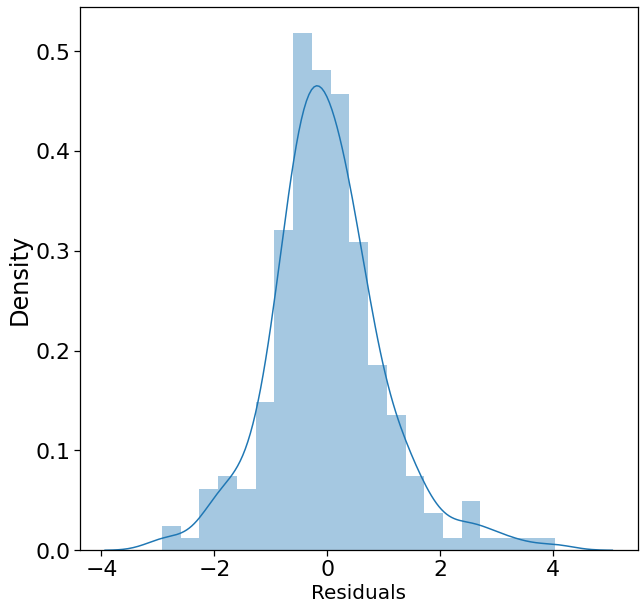

In [33]:
plt.figure(figsize = (10,10))
sns.set_context('notebook', font_scale = 2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20)

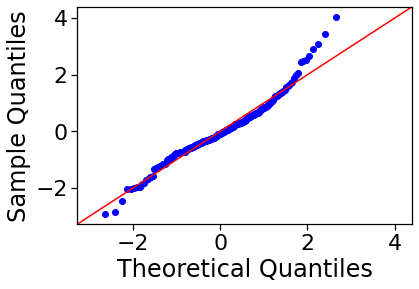

In [37]:
sm.qqplot(result.resid, line = '45')
plt.show()

## Gauss Markov Assumption

C:\Users\amarz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amarz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

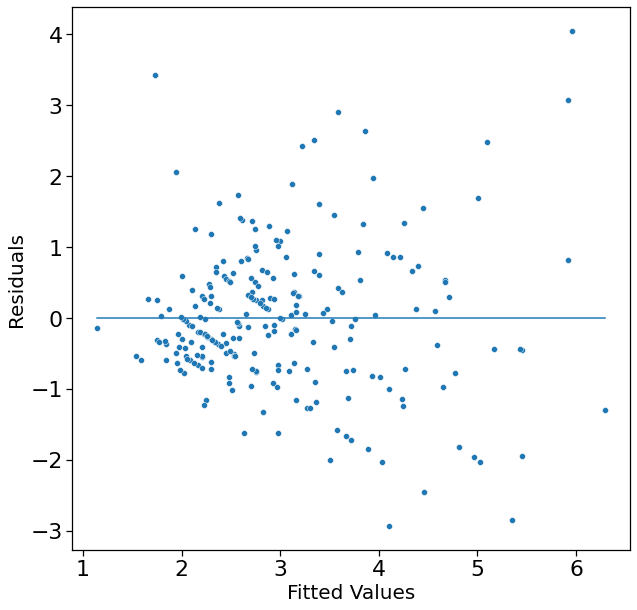

In [43]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(result.fittedvalues,result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

## Multicollinearity

In [45]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
def calc_vif(X):
    
    # Calculating vif
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [52]:
calc_vif(tips[['total_bill', 'size']])

,variables,VIF
0,total_bill,8.684373
1,size,8.684373


## Assumption Summary

Assumption Assesment:
1. If we refer to the histogram, the residual seemed normally distributed
1. Model residuals gather around zero
1. No certain pattern in the residual plot
1. Heteroscedasticity Occur
1. vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size.